In [ ]:
`import cv2 as cv
import tensorflow.keras as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import matplotlib.image as mpimg
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
!pip install kaggle
from google.colab import files
kagglef=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download trolukovich/food11-image-dataset
!mkdir data
!unzip food11-image-dataset.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/training/Soup/223.jpg  
  inflating: data/training/Soup/224.jpg  
  inflating: data/training/Soup/225.jpg  
  inflating: data/training/Soup/226.jpg  
  inflating: data/training/Soup/227.jpg  
  inflating: data/training/Soup/228.jpg  
  inflating: data/training/Soup/229.jpg  
  inflating: data/training/Soup/23.jpg  
  inflating: data/training/Soup/230.jpg  
  inflating: data/training/Soup/231.jpg  
  inflating: data/training/Soup/232.jpg  
  inflating: data/training/Soup/233.jpg  
  inflating: data/training/Soup/234.jpg  
  inflating: data/training/Soup/235.jpg  
  inflating: data/training/Soup/236.jpg  
  inflating: data/training/Soup/237.jpg  
  inflating: data/training/Soup/238.jpg  
  inflating: data/training/Soup/239.jpg  
  inflating: data/training/Soup/24.jpg  
  inflating: data/training/Soup/240.jpg  
  inflating: data/training/Soup/241.jpg  
  inflating: data/training/Soup/242.jpg  
  inflating: data/training/

In [ ]:
Train_dir='/content/data/training'
Test_dir='/content/data/validation'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
	Train_dir,
	target_size=(200,200),
	class_mode='categorical',
  batch_size=126
)
validation_generator = validation_datagen.flow_from_directory(
	Test_dir,
	target_size=(200,200),
	class_mode='categorical',
  batch_size=126
)

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 128)      0

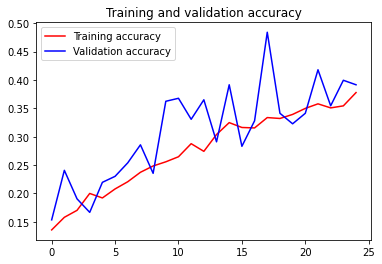

<Figure size 432x288 with 0 Axes>

In [ ]:
model=tf.models.Sequential([tf.layers.Conv2D(64,(3,3),activation='relu',input_shape=(250,250,3)),
                            tf.layers.MaxPooling2D(2,2),
                            tf.layers.Conv2D(64,(3,3),activation='relu'),
                            tf.layers.MaxPooling2D(2,2),
                            tf.layers.Conv2D(128,(3,3),activation='relu'),
                            tf.layers.MaxPooling2D(2,2),
                            tf.layers.Conv2D(128,(3,3),activation='relu'),
                            tf.layers.MaxPooling2D(2,2),
                            tf.layers.Flatten(),
                            tf.layers.Dropout(0.5),
                            tf.layers.Dense(512,activation='relu'),
                            tf.layers.Dense(11,activation='softmax')])
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
model.save("This")

INFO:tensorflow:Assets written to: This/assets


In [ ]:
import cv2 as cv
import tensorflow.keras as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import matplotlib.image as mpimg
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import files
model1u=files.upload()

Saving fclass.h5 to fclass.h5


In [ ]:
model1=tf.models.load_model('fclass.h5')